In [1]:
# Zomato Data Analysis Project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create the Data Frame
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [3]:
# Convert Data type of column rate
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


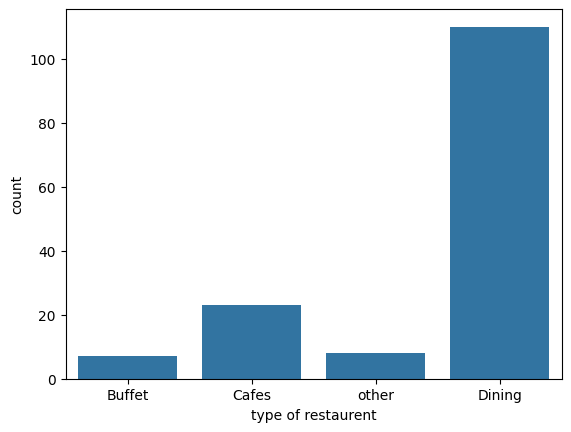

In [4]:
# Types of Restaurent
dataframe.head(0)
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of restaurent")
plt.show()

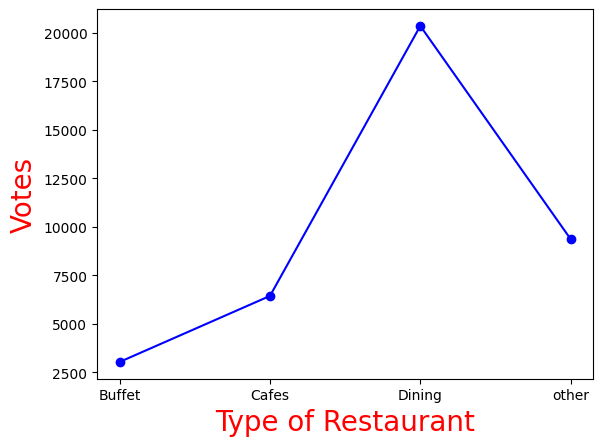

In [5]:
# Votes for restaurent
dataframe.head()
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result, color="blue", marker='o')
plt.xlabel("Type of Restaurant", color="red", size=20)
plt.ylabel("Votes", color="red", size=20)
plt.show()

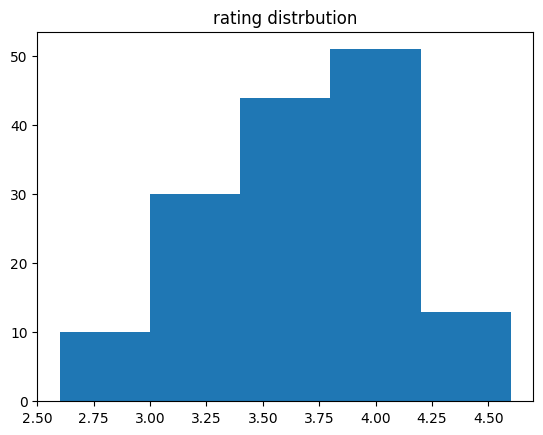

In [6]:
#Rating Distribution
dataframe.head()
plt.hist(dataframe['rate'],bins=5)
plt.title("rating distrbution")
plt.show()

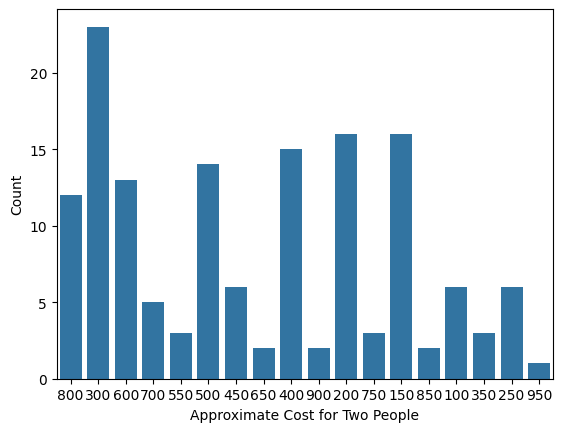

In [7]:
#Average order Spending By couples
dataframe.head()
dataframe['approx_cost(for two people)'] = dataframe['approx_cost(for two people)'].astype(str)
sns.countplot(x='approx_cost(for two people)', data=dataframe)
plt.xlabel("Approximate Cost for Two People")
plt.ylabel("Count")
plt.show()

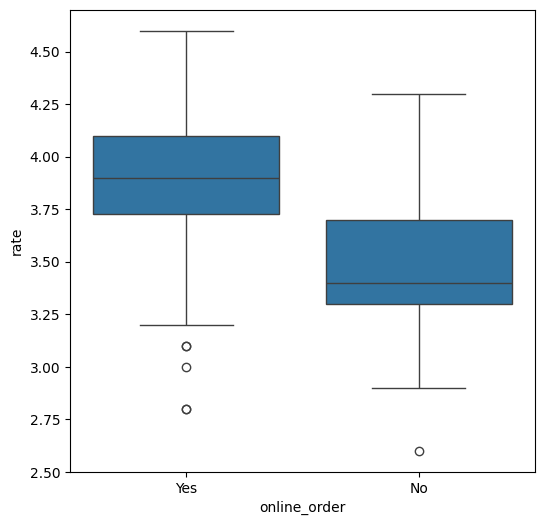

In [8]:
#which Mode Recieves Maximum Rating
dataframe.head()
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe)
plt.show()

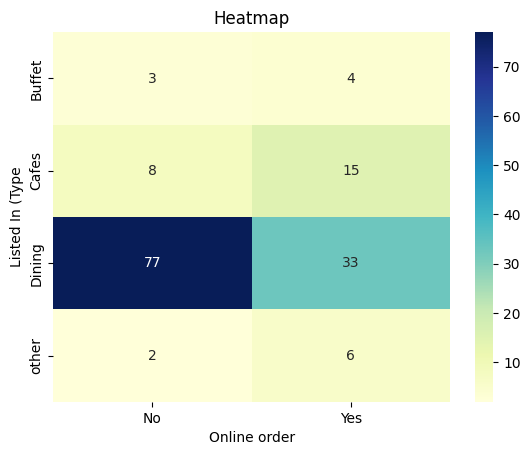

In [9]:
#HeatMap
dataframe.head()
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online order")
plt.ylabel("Listed In (Type")
plt.show()
